11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


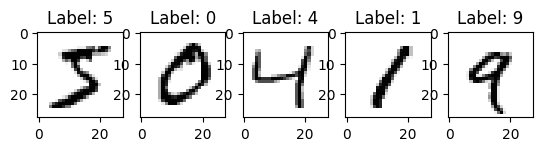

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.92      0.95      0.94      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.96      0.95      0.96       958
           7       0.89      0.94      0.92      1028
           8       0.95      0.93      0.94       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matrix:
[[ 951    0    5    3    1    4   12    2    2    0]
 [   0 1125    4    0    0    1    4    0    1    0]
 [   8    0  982    6    2    1    2   22    9    0]
 [   0    1   16  960    1    4    0   16

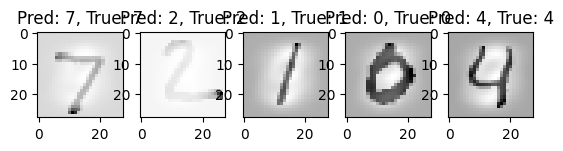

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shape of the data
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels: {y_test.shape}")

# Visualize some of the training data
for index in range(5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(X_train[index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {y_train[index]}")
plt.show()

# Flatten the images (28x28) into 1D vectors (784,) as SVM works with 1D data
X_train = X_train.reshape(X_train.shape[0], -1)  # Shape (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # Shape (10000, 784)

# Normalize the data (scale pixel values from 0-255 to 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# For better performance, scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', gamma='scale', C=10)
svm_model.fit(X_train[:10000], y_train[:10000])  # Use a subset to speed up training

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize some of the test predictions
for index, (image, prediction, true_label) in enumerate(zip(X_test[:5], y_pred[:5], y_test[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Pred: {prediction}, True: {true_label}")
plt.show()


# New Section

Validation Accuracy: 97.27%
Test Accuracy: 96.81%


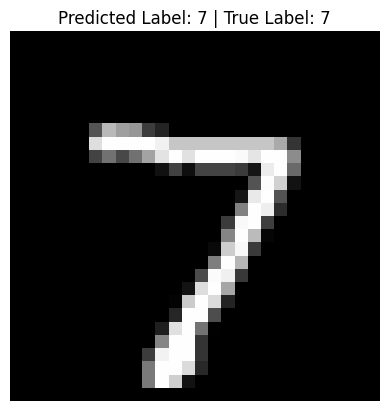

In [2]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images (28x28 pixels to 784 feature vectors)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize the data (values between 0 and 1)
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Split the training set further into training and validation sets
x_train_flat, x_val_flat, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)

# Create the k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can change n_neighbors as needed

# Train the model on the training set
knn_model.fit(x_train_flat, y_train)

# Evaluate the model on the validation set
y_val_pred = knn_model.predict(x_val_flat)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Test the model on the test set
y_test_pred = knn_model.predict(x_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Function to visualize the prediction
def display_prediction(index):
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f'Predicted Label: {y_test_pred[index]} | True Label: {y_test[index]}')
    plt.axis('off')
    plt.show()

# Test the function by visualizing a random prediction
display_prediction(0)  # Change the index to visualize different predictions
